In [5]:
from datasets import ConvexBananaDataset
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="convex_banana",
    dataset_number_of_points=10000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="unconstrained_optimal_transport_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=17,
        number_of_hidden_layers=8,
        activation_function_name="Softplus",
        network_type="PISCNN",
        potential_to_estimate_with_neural_network="u"
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=10,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)

Epoch: 10, Objective: 1.132, LR: 0.000000: 100%|██████████| 10/10 [00:30<00:00,  3.07s/it]


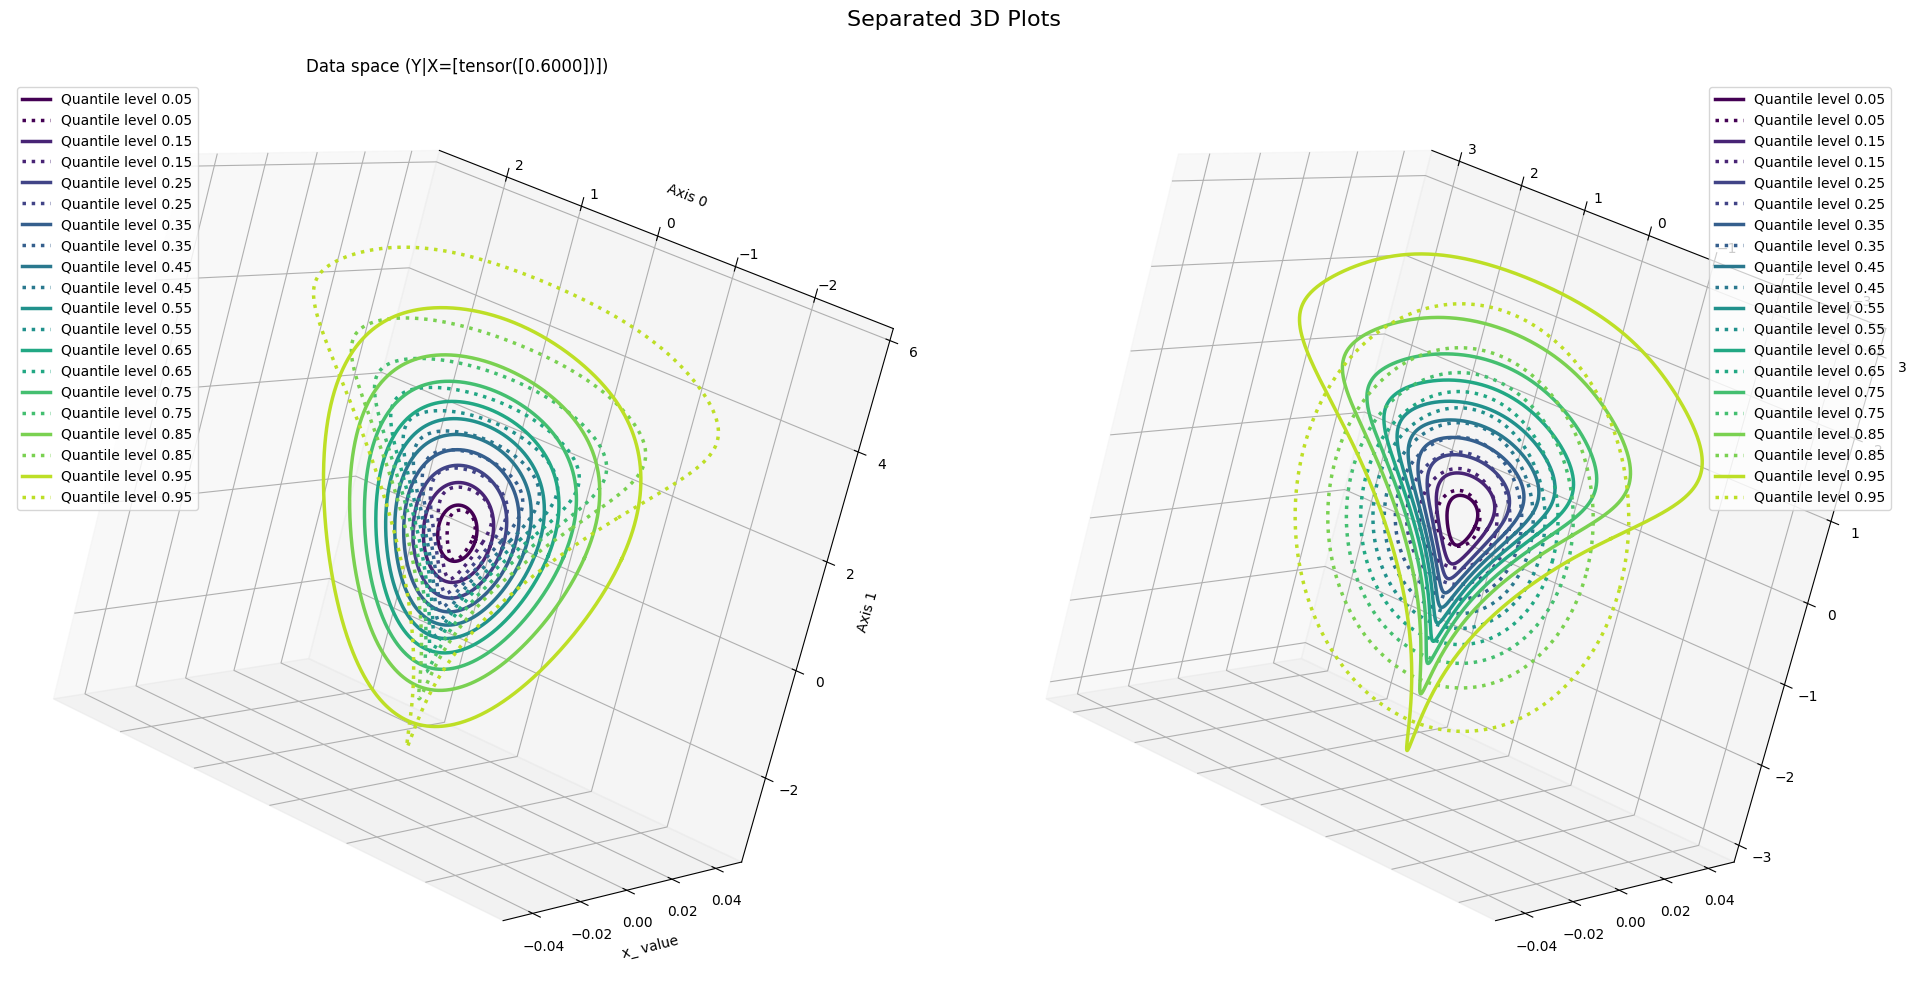

In [ ]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
dataset = ConvexBananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[0.]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)